# Project Predictive modeling


In [27]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, LSTM
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [28]:
split = ['train[:80%]', 'train[80%:]']
classNames = ["tumor","stroma","complex","lympho","debris","mucosa","adipose","empty"]
trainDataset, testDataset = tfds.load(name='colorectal_histology', split=split, as_supervised=True)

In [29]:
trainDataset

<PrefetchDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

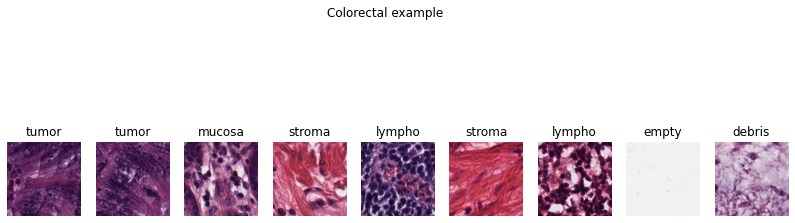

In [30]:
i = 0
fig, ax = plt.subplots(1, 9,figsize=(14,5))
fig.suptitle("Colorectal example")

for image, label in testDataset.take(9):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [31]:
for image,label in testDataset.take(25):
    print(image.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


We can see that the pictures have the same time but we're going to resize them in a smaller size because if we don't do it the model won't be performant


In [32]:
def preprocess(img, label):
  return tf.image.resize(img, [48, 48]) / 255, label

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

trainDataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [53]:
model1=keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=(48,48, 3)))
model1.add(Flatten())

model1.add(Dense(activation='relu', units=128))
model1.add(Dense(activation='softmax', units=8))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 6912)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               884864    
                                                                 
 dense_37 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 885,896
Trainable params: 885,896
Non-trainable params: 0
_________________________________________________________________


In [56]:
history=model1.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 0.8213 - accuracy: 0.6582 - val_loss: 1.2928 - val_accuracy: 0.4500
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7930 - accuracy: 0.6730 - val_loss: 1.2913 - val_accuracy: 0.4620
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.7672 - accuracy: 0.6867 - val_loss: 1.3346 - val_accuracy: 0.4580
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7476 - accuracy: 0.6955 - val_loss: 1.3095 - val_accuracy: 0.4760
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7293 - accuracy: 0.7025 - val_loss: 1.2780 - val_accuracy: 0.5040
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7100 - accuracy: 0.7090 - val_loss: 1.2569 - val_accuracy: 0.5240
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7101 - accuracy: 0.7088 - val_loss: 1.2337 - val_accuracy: 0.4940
Epoch 

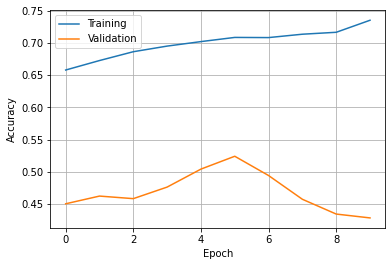

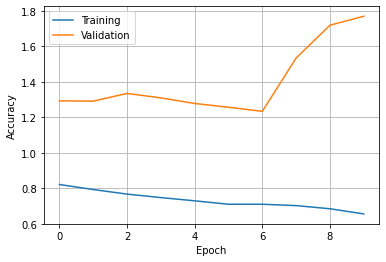

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [82]:
model2=keras.Sequential()
model2.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(activation='relu', units=128))
model2.add(Dense(activation='softmax', units=8))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 16928)             0         
                                                                 
 dense_66 (Dense)            (None, 128)               2166912   
                                                                 
 dense_67 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 2,168,840
Trainable params: 2,168,840
Non-trainable params: 0
___________________________________________

In [83]:
history=model2.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
125/125 [==============================] - 1s 7ms/step - loss: 1.2661 - accuracy: 0.4997 - val_loss: 0.9626 - val_accuracy: 0.5980
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.8329 - accuracy: 0.6575 - val_loss: 0.8003 - val_accuracy: 0.6580
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.7031 - accuracy: 0.7262 - val_loss: 0.7805 - val_accuracy: 0.6780
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6147 - accuracy: 0.7667 - val_loss: 0.7671 - val_accuracy: 0.6940
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 0.5234 - accuracy: 0.8117 - val_loss: 0.7338 - val_accuracy: 0.7150
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.8213 - val_loss: 0.7026 - val_accuracy: 0.7250
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.4385 - accuracy: 0.8403 - val_loss: 0.7508 - val_accuracy: 0.6960
Epoch 

As we can see the accuracy is very good but the validation accuracy is very small compared to the train accuracy. We can conclude that the model overfit a lot the trainning data. That's why we also have validation value for the loss very high.

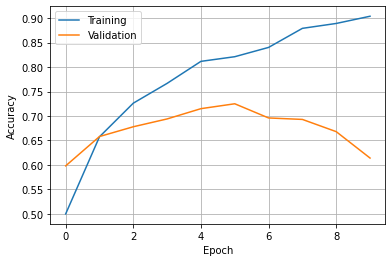

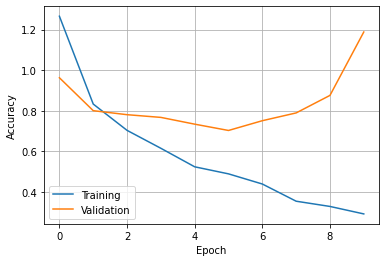

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [111]:
model3=keras.Sequential()
model3.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Convolution2D(24, (3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))


model3.add(Flatten())

model3.add(Dense(activation='relu', units=128))
model3.add(Dense(activation='softmax', units=8))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 23, 23, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 21, 21, 24)        6936      
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 10, 10, 24)       0         
 ng2D)                                                           
                                                                 
 flatten_39 (Flatten)        (None, 2400)              0         
                                                                 
 dense_99 (Dense)            (None, 128)             

In [112]:
history=model3.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
125/125 [==============================] - 1s 8ms/step - loss: 1.1684 - accuracy: 0.5105 - val_loss: 0.9679 - val_accuracy: 0.5730
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.8661 - accuracy: 0.6450 - val_loss: 0.9528 - val_accuracy: 0.6020
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.7915 - accuracy: 0.6737 - val_loss: 0.7609 - val_accuracy: 0.6840
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.7215 - val_loss: 0.7193 - val_accuracy: 0.7410
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6578 - accuracy: 0.7355 - val_loss: 0.6647 - val_accuracy: 0.7480
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6260 - accuracy: 0.7487 - val_loss: 0.6558 - val_accuracy: 0.7280
Epoch 7/10
125/125 [==============================] - 1s 7ms/step - loss: 0.5678 - accuracy: 0.7795 - val_loss: 0.6183 - val_accuracy: 0.7340
Epoch 

With 2 convolutional 2D layers the accuracy score of the training is lower than with only one 2D layer be there are no more overfitting because as we can see the accuracy of the validation is very close to the train accuracy as for the loss.

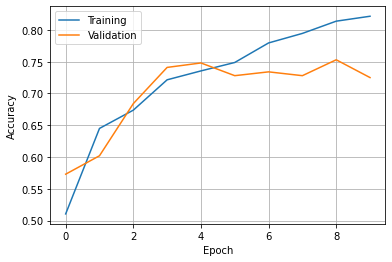

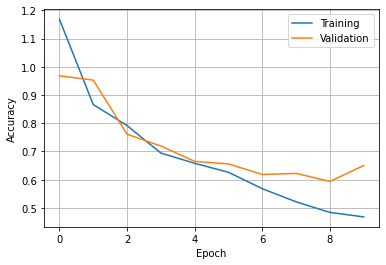

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [119]:
model4 = keras.Sequential()

model4.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Convolution2D(24, (3, 3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))



model4.add(Flatten())

model4.add(Dense(activation='relu', units=256))
model4.add(Dense(activation='relu', units=128))
model4.add(Dense(activation='softmax', units=8))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 23, 23, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 21, 21, 24)        6936      
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 10, 10, 24)       0         
 ng2D)                                                           
                                                                 
 flatten_41 (Flatten)        (None, 2400)              0         
                                                                 
 dense_104 (Dense)           (None, 256)             

In [120]:
history=model4.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
125/125 [==============================] - 1s 8ms/step - loss: 1.2806 - accuracy: 0.4563 - val_loss: 0.9071 - val_accuracy: 0.6360
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.8886 - accuracy: 0.6258 - val_loss: 0.7735 - val_accuracy: 0.6950
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.8049 - accuracy: 0.6683 - val_loss: 0.8037 - val_accuracy: 0.6570
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6848 - accuracy: 0.7405 - val_loss: 0.6248 - val_accuracy: 0.7560
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6215 - accuracy: 0.7598 - val_loss: 0.5716 - val_accuracy: 0.7670
Epoch 6/10
125/125 [==============================] - 1s 8ms/step - loss: 0.6142 - accuracy: 0.7575 - val_loss: 0.6334 - val_accuracy: 0.7320
Epoch 7/10
125/125 [==============================] - 1s 7ms/step - loss: 0.5550 - accuracy: 0.7815 - val_loss: 0.6373 - val_accuracy: 0.7260
Epoch 

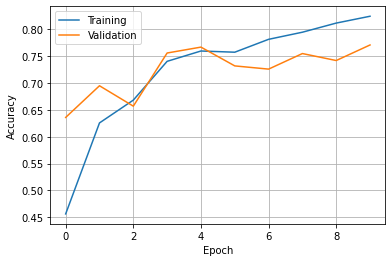

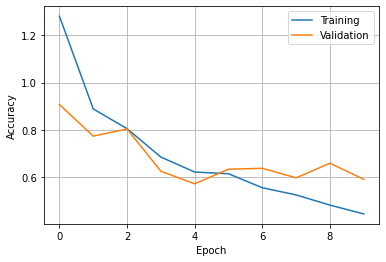

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [131]:
model5 = keras.Sequential()

model5.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model5.add(MaxPool2D(pool_size=(2, 2)))

model5.add(Convolution2D(24, (3, 3), activation='relu'))
model5.add(MaxPool2D(pool_size=(2, 2)))


model5.add(Flatten())
model5.add(tf.keras.layers.Dropout(0.1))

model5.add(Dense(activation='relu', units=256))

model5.add(Dense(activation='relu', units=128))

model5.add(Dense(activation='softmax', units=8))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_123 (MaxPooli  (None, 23, 23, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 21, 21, 24)        6936      
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 10, 10, 24)       0         
 ng2D)                                                           
                                                                 
 flatten_46 (Flatten)        (None, 2400)              0         
                                                                 
 dropout_21 (Dropout)        (None, 2400)            

In [132]:
history=model5.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
125/125 [==============================] - 1s 8ms/step - loss: 1.2066 - accuracy: 0.4880 - val_loss: 0.8866 - val_accuracy: 0.6130
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.8691 - accuracy: 0.6423 - val_loss: 0.7646 - val_accuracy: 0.6860
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.7763 - accuracy: 0.6810 - val_loss: 0.7568 - val_accuracy: 0.6750
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.7085 - accuracy: 0.7120 - val_loss: 0.6985 - val_accuracy: 0.7300
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6367 - accuracy: 0.7498 - val_loss: 0.7109 - val_accuracy: 0.7210
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 0.6172 - accuracy: 0.7502 - val_loss: 0.5719 - val_accuracy: 0.7660
Epoch 7/10
125/125 [==============================] - 1s 7ms/step - loss: 0.5762 - accuracy: 0.7697 - val_loss: 0.6613 - val_accuracy: 0.7350
Epoch 

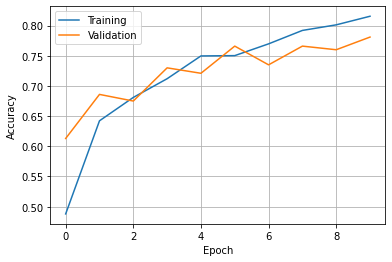

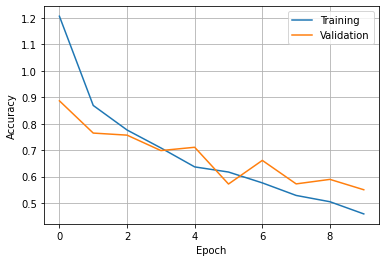

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [145]:
model6 = keras.Sequential()
model6.add(tf.keras.layers.BatchNormalization())

model6.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model6.add(MaxPool2D(pool_size=(2, 2)))


model6.add(Convolution2D(24, (3, 3), activation='relu'))
model6.add(MaxPool2D(pool_size=(2, 2)))



model6.add(Flatten())
model6.add(tf.keras.layers.Dropout(0.1))

model6.add(Dense(activation='relu', units=256))
model6.add(Dense(activation='relu', units=128))
model6.add(Dense(activation='softmax', units=8))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [146]:
history=model6.fit(trainDataset, epochs=30, validation_data=testDataset)

Epoch 1/30
125/125 [==============================] - 2s 9ms/step - loss: 1.0754 - accuracy: 0.5272 - val_loss: 1.4952 - val_accuracy: 0.2930
Epoch 2/30
125/125 [==============================] - 1s 7ms/step - loss: 0.7633 - accuracy: 0.6975 - val_loss: 0.7685 - val_accuracy: 0.7350
Epoch 3/30
125/125 [==============================] - 1s 8ms/step - loss: 0.6373 - accuracy: 0.7510 - val_loss: 0.6376 - val_accuracy: 0.7460
Epoch 4/30
125/125 [==============================] - 1s 7ms/step - loss: 0.5243 - accuracy: 0.8037 - val_loss: 0.6341 - val_accuracy: 0.7510
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4455 - accuracy: 0.8310 - val_loss: 0.7378 - val_accuracy: 0.7330
Epoch 6/30
125/125 [==============================] - 1s 7ms/step - loss: 0.3980 - accuracy: 0.8512 - val_loss: 0.7439 - val_accuracy: 0.7400
Epoch 7/30
125/125 [==============================] - 1s 7ms/step - loss: 0.3309 - accuracy: 0.8830 - val_loss: 1.1094 - val_accuracy: 0.6490
Epoch 

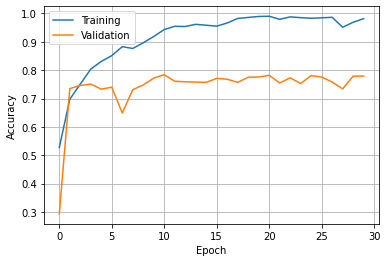

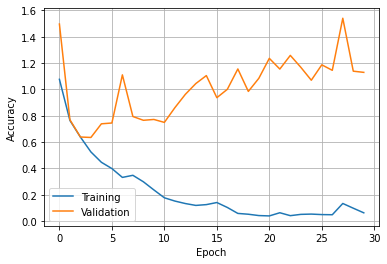

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [167]:
model7 = keras.Sequential()

model7.add(Convolution2D(32, (3 ,3), input_shape=(48,48, 3), activation='relu'))
model7.add(tf.keras.layers.BatchNormalization())

model7.add(MaxPool2D(pool_size=(2, 2)))

model7.add(Convolution2D(24, (3, 3), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))


model7.add(Flatten())
model7.add(tf.keras.layers.Dropout(0.2))

model7.add(Dense(activation='relu', units=256))
model7.add(tf.keras.layers.Dropout(0.2))

model7.add(Dense(activation='relu', units=128))
model7.add(tf.keras.layers.Dropout(0.2))

model7.add(Dense(activation='softmax', units=8))

model7.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [168]:
history=model7.fit(trainDataset, epochs=30, validation_data=testDataset)

Epoch 1/30
125/125 [==============================] - 2s 9ms/step - loss: 1.3952 - accuracy: 0.4238 - val_loss: 1.7374 - val_accuracy: 0.3180
Epoch 2/30
125/125 [==============================] - 1s 8ms/step - loss: 0.9904 - accuracy: 0.5968 - val_loss: 1.3443 - val_accuracy: 0.4900
Epoch 3/30
125/125 [==============================] - 1s 8ms/step - loss: 0.8690 - accuracy: 0.6603 - val_loss: 1.1344 - val_accuracy: 0.5090
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 0.7981 - accuracy: 0.6935 - val_loss: 0.9379 - val_accuracy: 0.6030
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: 0.7310 - accuracy: 0.7293 - val_loss: 0.7429 - val_accuracy: 0.6830
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: 0.7155 - accuracy: 0.7287 - val_loss: 0.6432 - val_accuracy: 0.7330
Epoch 7/30
125/125 [==============================] - 1s 8ms/step - loss: 0.6461 - accuracy: 0.7535 - val_loss: 0.6239 - val_accuracy: 0.7440
Epoch 

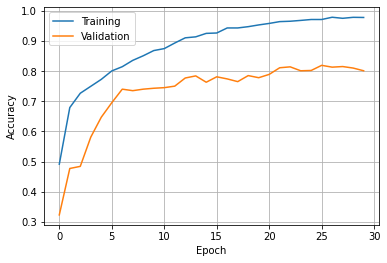

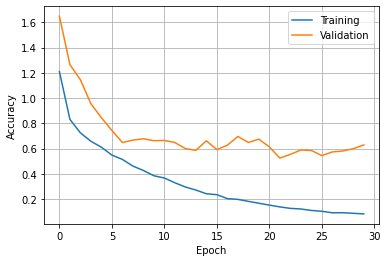

In [166]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()